In [2]:
%load_ext autoreload
%autoreload 2

# Setup Environment
import sys
import os
ROOT = '../../'
sys.path.append(ROOT)

import gym
from gym.spaces import Discrete
import numpy as np
from gym.wrappers.monitoring.video_recorder import VideoRecorder
from IPython.display import HTML
from source.agents.policy_gradient_agent import PolicyGradientAgent
from source import utils
from tqdm import tqdm
import torch
import random

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
using device: cpu
policy_gradient_agent_test passed!


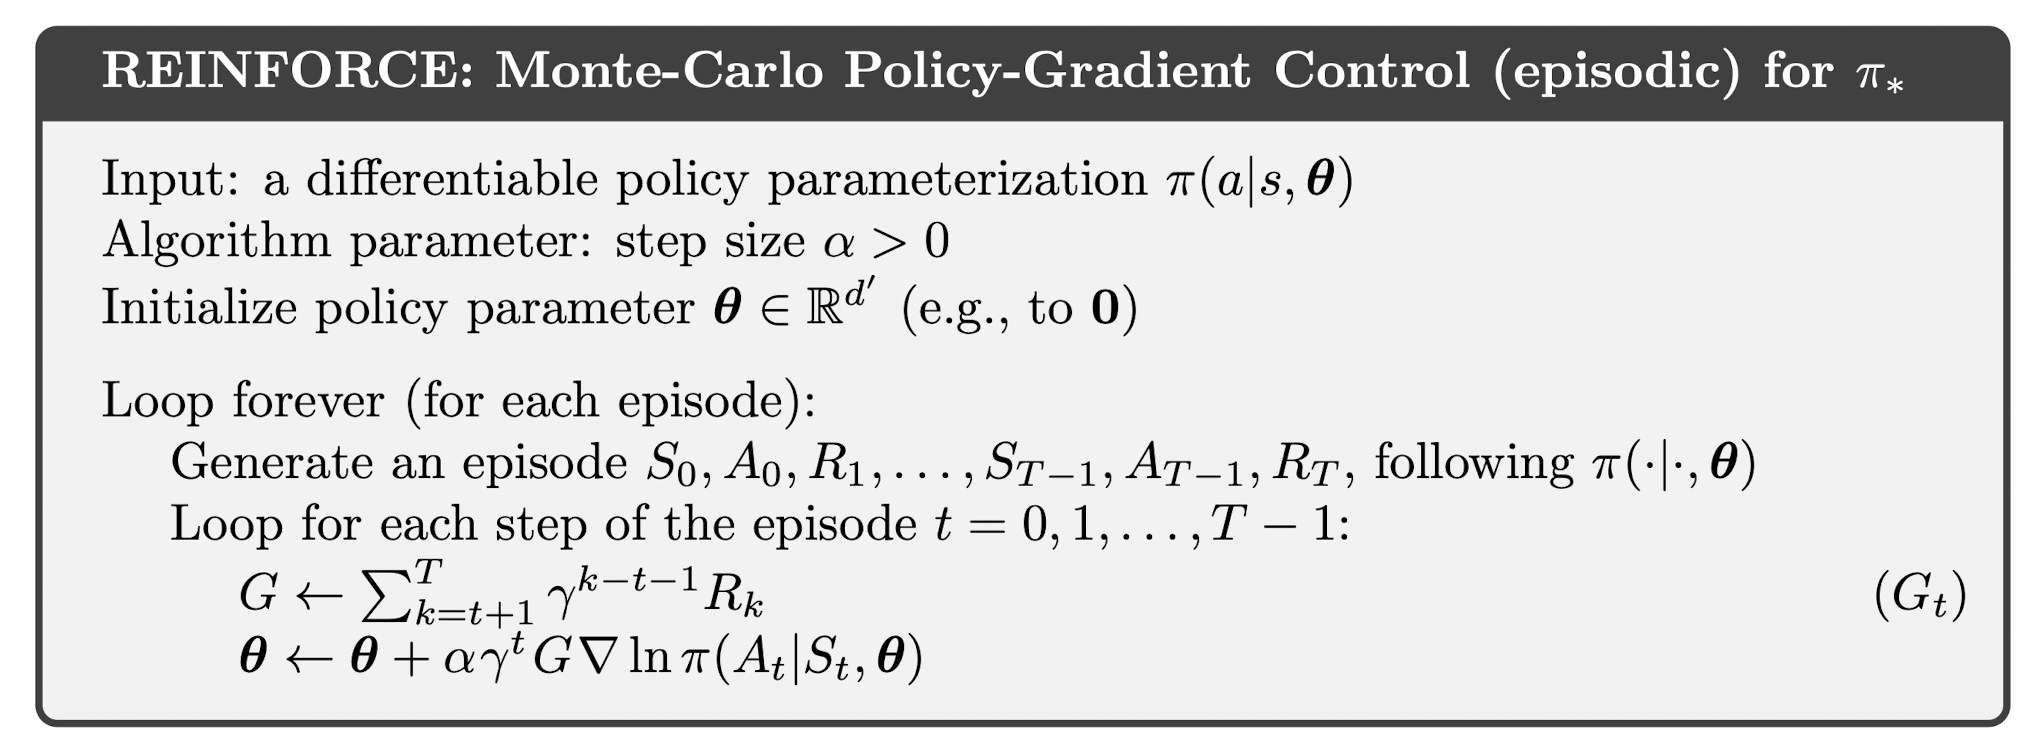

using device: cpu


100%|██████████| 100/100 [00:04<00:00, 20.24it/s]


step: 0, epsilon: None, average_return: -170.37695528185625, success rate: 0.0


100%|██████████| 100/100 [00:13<00:00,  7.33it/s]


step: 1, epsilon: None, average_return: -137.66877100051556, success rate: 0.1


100%|██████████| 100/100 [00:19<00:00,  5.11it/s]


step: 2, epsilon: None, average_return: -103.09376393481384, success rate: 0.33


100%|██████████| 100/100 [00:22<00:00,  4.39it/s]


step: 3, epsilon: None, average_return: -87.00315901940054, success rate: 0.5


100%|██████████| 100/100 [00:25<00:00,  4.00it/s]


step: 4, epsilon: None, average_return: -80.95215467757963, success rate: 0.19


100%|██████████| 100/100 [00:11<00:00,  9.04it/s]


step: 5, epsilon: None, average_return: -73.98165871883668, success rate: 0.16


100%|██████████| 100/100 [00:32<00:00,  3.12it/s]


step: 6, epsilon: None, average_return: -55.64118702807447, success rate: 0.66


100%|██████████| 100/100 [00:21<00:00,  4.73it/s]


step: 7, epsilon: None, average_return: -47.867983164645764, success rate: 0.55


100%|██████████| 100/100 [01:28<00:00,  1.14it/s]


step: 8, epsilon: None, average_return: -41.26565662290192, success rate: 0.49


100%|██████████| 100/100 [00:50<00:00,  1.96it/s]


step: 9, epsilon: None, average_return: -28.06708467062642, success rate: 0.77

rewarding episodes: -28067.08467062634


100%|██████████| 100/100 [00:35<00:00,  2.83it/s]

Average return = 114.85644183599956, Success rate = 0.78


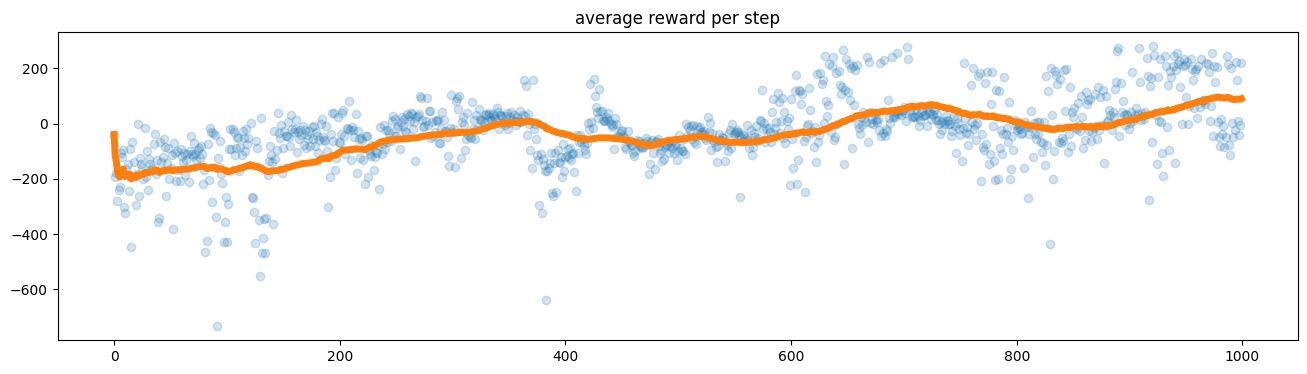

In [5]:
# Policy Eval
# Params
num_epoch = 10
num_episode = 100
video_path = os.path.join(ROOT, "video/reinforce.mp4")
random_seed = 101

# Initialize
history = []
total_reward = 0
# set random seeds
rng = np.random.default_rng(random_seed)
#random.seed(random_seed)
np.random.seed(random_seed)
#torch.manual_seed(random_seed)
# epsilon decay
epsilon_schedule = utils.create_decay_schedule(num_epoch)
lr_schedule = utils.create_decay_schedule(num_epoch)

# Create Environment.
#env = gym.make('Taxi-v3')
# using render_mode=rgb_array so that video recording works
env = gym.make(
    "LunarLander-v2",
    render_mode='rgb_array'
)
env.np_random = rng

# Create Agent
agent = PolicyGradientAgent(
    state_space=env.observation_space,
    action_space=env.action_space,
    discount_rate=0.99,
    epsilon=None, # use epsilon_schedule
    learning_rate=1e-3,
)
# Start Learning
for i in range(num_epoch):
    hisotry = []
    success = 0
    for _ in tqdm(range(num_episode)):
        reward, steps = agent.play_episode(env)
        if reward > 0:
            success += 1
        history.append(reward)
        total_reward += reward
    print(
        f"step: {i}, average_return: {np.mean(history)}, success rate: {success / num_episode}")
print(f"\nrewarding episodes: {total_reward}")

# For off policy learning only: get greedy policy (no exploration)
#agent._policy = get_epsilon_greedy_policy_from_action_values(agent._Q.weight)
# Run Eval
avarge_return, success_rate = utils.evaluate_agent(agent, env, 100)
print(f"Average return = {avarge_return}, Success rate = {success_rate}")

# play last episode with video recording

utils.plot_history(history)


In [6]:

reward, _ = agent.play_episode(env, learning=False, video_path=video_path, epsilon=0)
print(reward)
html=utils.render_mp4(video_path)
HTML(html)


Moviepy - Building video ../../video/reinforce.mp4.
Moviepy - Writing video ../../video/reinforce.mp4



Moviepy - Done !
Moviepy - video ready ../../video/reinforce.mp4
265.74744287552517
